In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")   # hide warnings


## Data Preprocessing

In [2]:
data = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding='latin1')
data.head(20)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
# described object data  type 
data.describe(include='object')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [5]:
# handle null samples
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
# How many samples of duplicated 
data.duplicated().sum()

6

In [7]:
# Handling duplicate values 
data.drop_duplicates(inplace=True)

In [8]:
# Handling Null values 
data.dropna(inplace=True)

In [9]:
data.shape

(5659, 10)

In [10]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [11]:
# convert year
data['Year'] = pd.to_numeric(data['Year'].str.replace(r'[()]', '', regex=True), errors='coerce')

# convert duration (remove ' min' if exists then convert)
data['Duration'] = data['Duration'].str.replace(' min','', regex=False)
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# convert votes (remove commas then convert)
data['Votes'] = data['Votes'].str.replace(',','', regex=False)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


## Exploratory Data Analysis (EDA):

In [13]:
# Descriptive Statistics for all columns
data.describe(include='object')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659
unique,5385,376,2431,1960,2321,2556
top,Baazi,Drama,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,844,41,104,52,57


In [14]:
data.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


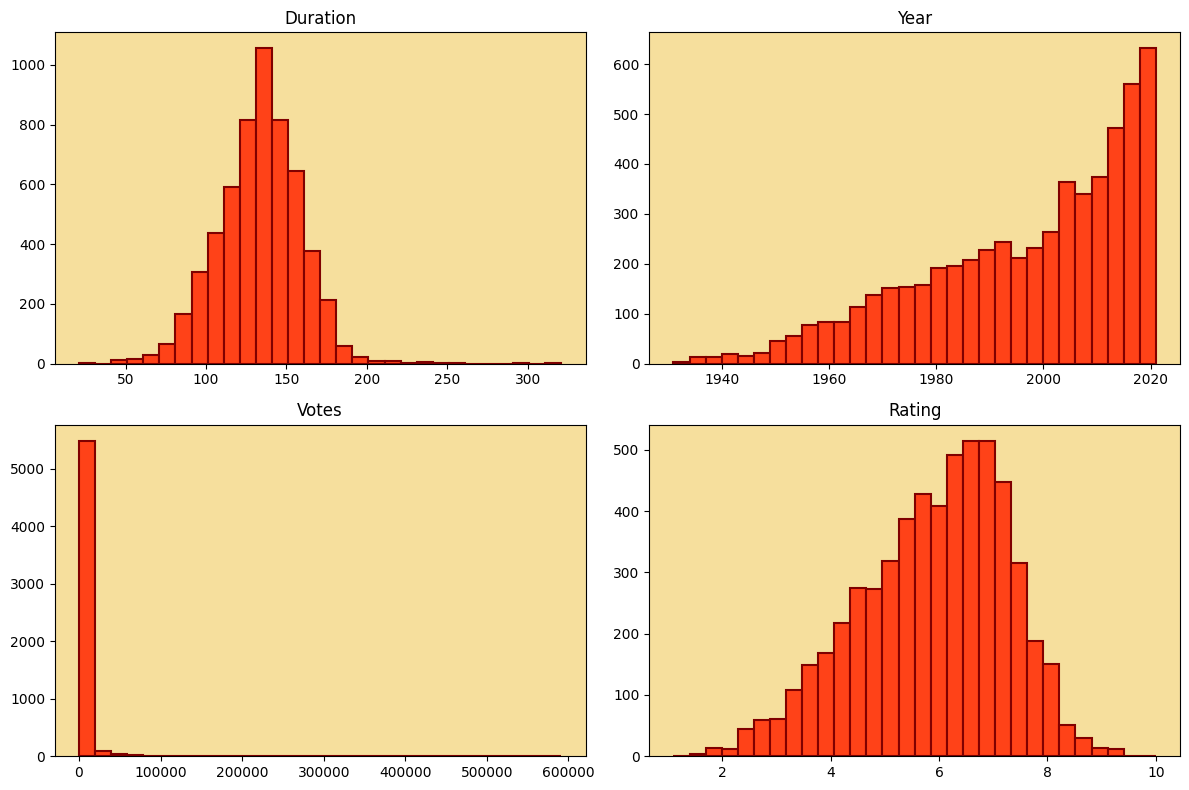

In [15]:
import matplotlib.pyplot as plt

cols = ['Duration', 'Year', 'Votes', 'Rating']

fig, axs = plt.subplots(2, 2, figsize=(12,8))

for ax, col in zip(axs.ravel(), cols):
    ax.hist(data[col], bins=30, color='#FF4218', edgecolor='#800000', linewidth=1.5)
    ax.set_title(col)
    ax.set_facecolor('#F6DF9D')

plt.tight_layout()
plt.show()

In [16]:
# Top 10 directors (average rating)
top_directors_rating = (
    data.groupby('Director')['Rating']
        .mean()
        .sort_values(ascending=False)
        .head(10)
)
print("Top 10 directors by Average Rating:")
print(top_directors_rating)

# Top 10 directors (sum votes)
top_directors_votes = (
    data.groupby('Director')['Votes']
        .sum()
        .sort_values(ascending=False)
        .head(10)
)
print("\nTop 10 directors by Total Votes:")
print(top_directors_votes)

# Top 10 directors by number of movies
top_directors_count = (
    data['Director']
        .value_counts()
        .head(10)
)
print("\nTop 10 directors by Number of Movies:")
print(top_directors_count)


Top 10 directors by Average Rating:
Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Munni Pankaj        9.4
Suhrud Godbole      9.4
Arvind Pratap       9.4
Venkatesh Bk        9.3
Sapna Bhavnani      9.3
Vishwa Bhanu        9.3
Rahul Mallick       9.3
Gautam Joshi        9.3
Name: Rating, dtype: float64

Top 10 directors by Total Votes:
Director
Rajkumar Hirani         695141
Ang Lee                 591417
Karan Johar             252990
Prabhu Deva             246108
Ashutosh Gowariker      245069
Neeraj Pandey           229349
Anurag Kashyap          221032
Garth Davis             220526
Richard Attenborough    220118
Nitesh Tiwari           208778
Name: Votes, dtype: int64

Top 10 directors by Number of Movies:
Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal   

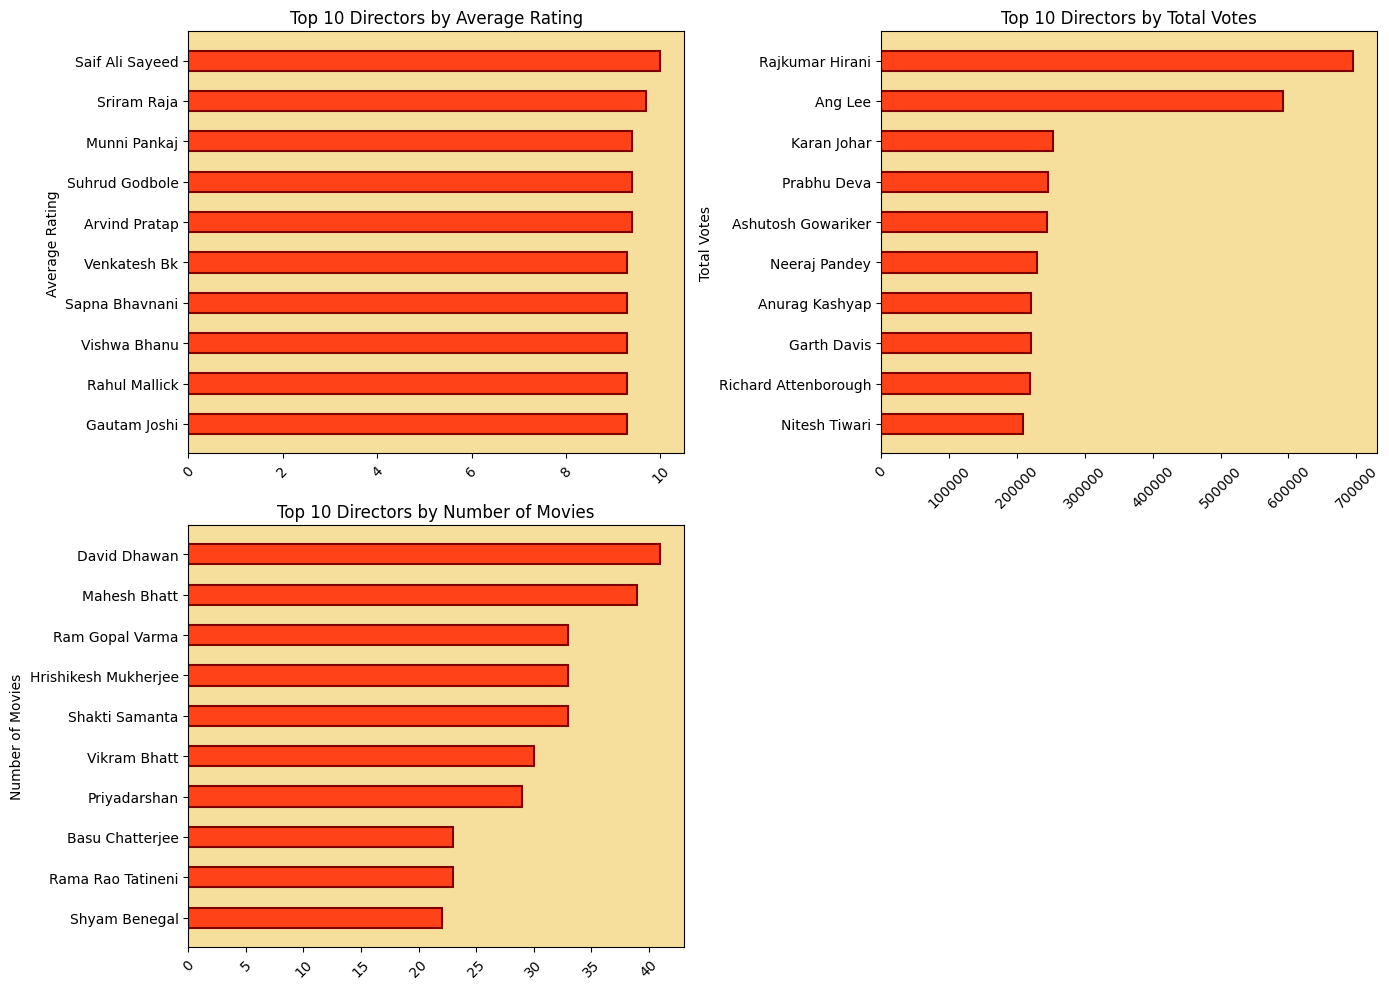

In [17]:

charts = [
    (top_directors_rating, "Top 10 Directors by Average Rating", "Average Rating"),
    (top_directors_votes, "Top 10 Directors by Total Votes", "Total Votes"),
    (top_directors_count, "Top 10 Directors by Number of Movies", "Number of Movies")
]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#fig.patch.set_facecolor('#f0f0f0')


# flatten axes 
axes = axes.flatten()


for i, (data_var, title, ylabel) in enumerate(charts):
    
    axes[i].barh(data_var.index[::-1], data_var.values[::-1],  color='#FF4218', edgecolor='#800000', height=0.5, linewidth=1.5)
    axes[i].set_title(title)
    axes[i].set_ylabel(ylabel)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_facecolor('#F6DF9D')

# remove subplot 
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


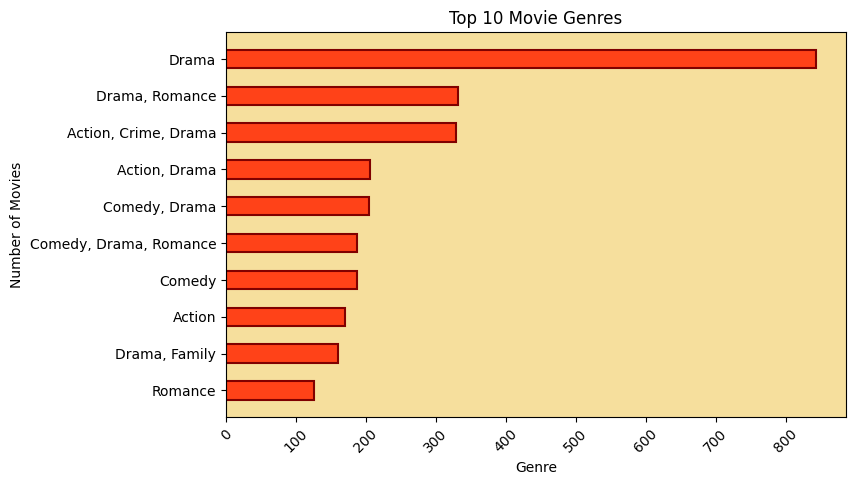

In [18]:
# Count the most common movie genres and visualize the top 10 using a chart
top_genres = data['Genre'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_genres.index[::-1], top_genres.values[::-1],  color='#FF4218', edgecolor='#800000', height=0.5, linewidth=1.5)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top 10 Movie Genres")
plt.gca().set_facecolor('#F6DF9D')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Combine actor columns and count the frequency to print the top 10 most featured actors in all movies

combined_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
top_10_actors = combined_actors.value_counts().head(10)
print("Most Featured Actors in Movies:")

print(top_10_actors)


Most Featured Actors in Movies:
Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Name: count, dtype: int64


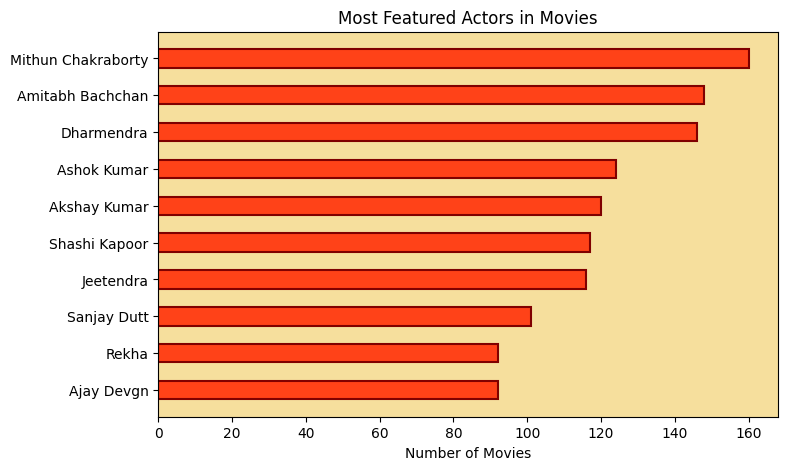

In [20]:
# This we plot the top 10 most featured actors in all movies using a chart (reverse order to show the highest at top).


plt.figure(figsize=(8,5))
plt.barh(top_10_actors.index[::-1], top_10_actors.values[::-1],  color='#FF4218', edgecolor='#800000', height=0.5, linewidth=1.5)
plt.xlabel("Number of Movies")
plt.title("Most Featured Actors in Movies")
plt.gca().set_facecolor('#F6DF9D')
plt.show()

Text(0.5, 1.0, 'Most Featured Actors in High-Rated Movies')

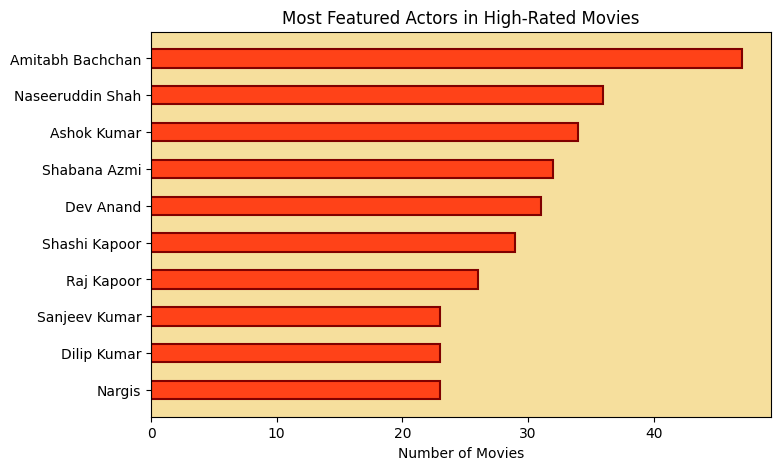

In [21]:
# Here we find the top 10 actors who appear the most in the highest-rated 20% of movies, then plots them in a chart.
high_rating_threshold = data['Rating'].quantile(0.8)  
high_rated_movies = data[data['Rating'] >= high_rating_threshold]

combined_actors = pd.concat([high_rated_movies['Actor 1'], 
                             high_rated_movies['Actor 2'], 
                             high_rated_movies['Actor 3']])

top_10_actors = combined_actors.value_counts().head(10)
top_10_actors_sorted = top_10_actors.sort_values()

plt.figure(figsize=(8,5))
plt.barh(top_10_actors_sorted.index, top_10_actors_sorted.values, color='#FF4218', edgecolor='#800000', height=0.5, linewidth=1.5)
plt.xlabel("Number of Movies")
plt.gca().set_facecolor('#F6DF9D')
plt.title("Most Featured Actors in High-Rated Movies")  


## Feature Engineering¶
 

In [22]:
# Create new columns that give us new features related to the rating column

data['Rating_Votes_Score'] = data['Rating'] * data['Votes']
data['Rating_Per_Minute'] = data['Rating'] / data['Duration']

data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rating_Votes_Score,Rating_Per_Minute
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,56.0,0.064220
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,154.0,0.040000
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,3886.9,0.031973
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,8036.4,0.052113
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1825.6,0.068293
...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,2488.8,0.053043
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,9275.2,0.040523
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,255.2,0.046400
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,2947.5,0.034884


In [23]:
# Compute the average rating for each director (group aggregation)
mean_rating_by_director = data.groupby('Director')['Rating'].mean()
data['Director_Rating_Score'] = data['Director'].map(data.groupby('Director')['Rating'].mean())

                                                     
# Compute the average rating for each genre (group aggregation) 
data['Genre_Rating_Score'] = data['Genre'].map(data.groupby('Genre')['Rating'].mean())


# Compute the average rating for each actor 1 (group aggregation) 
data['Actor1_Rating_Score'] = data['Actor 1'].map(data.groupby('Actor 1')['Rating'].mean())


# Compute the average rating for each actor 2 (group aggregation) 
data['Actor2_Rating_Score'] = data['Actor 2'].map(data.groupby('Actor 2')['Rating'].mean())


# Compute the average rating for each actor 3 (group aggregation) 
data['Actor3_Rating_Score'] = data['Actor 3'].map(data.groupby('Actor 3')['Rating'].mean())

data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rating_Votes_Score,Rating_Per_Minute,Director_Rating_Score,Genre_Rating_Score,Actor1_Rating_Score,Actor2_Rating_Score,Actor3_Rating_Score
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,56.0,0.064220,7.000000,6.415521,6.850000,7.000000,7.000000
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,154.0,0.040000,4.400000,5.716822,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,3886.9,0.031973,5.313333,6.242222,4.788889,5.786667,5.872727
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,8036.4,0.052113,7.383333,6.820000,5.435000,6.933333,6.500000
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1825.6,0.068293,5.600000,5.477778,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,2488.8,0.053043,6.100000,6.415521,6.725000,6.100000,5.850000
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,9275.2,0.040523,7.250000,6.950000,4.157143,5.823077,5.954545
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,255.2,0.046400,6.270000,5.743465,6.307692,5.800000,6.050000
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,2947.5,0.034884,5.225000,5.516505,5.481707,4.640000,5.737500


In [24]:
data.drop(columns=['Name'] , inplace=True)

In [25]:
data


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rating_Votes_Score,Rating_Per_Minute,Director_Rating_Score,Genre_Rating_Score,Actor1_Rating_Score,Actor2_Rating_Score,Actor3_Rating_Score
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,56.0,0.064220,7.000000,6.415521,6.850000,7.000000,7.000000
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,154.0,0.040000,4.400000,5.716822,5.420000,4.400000,4.450000
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,3886.9,0.031973,5.313333,6.242222,4.788889,5.786667,5.872727
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,8036.4,0.052113,7.383333,6.820000,5.435000,6.933333,6.500000
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1825.6,0.068293,5.600000,5.477778,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,2488.8,0.053043,6.100000,6.415521,6.725000,6.100000,5.850000
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,9275.2,0.040523,7.250000,6.950000,4.157143,5.823077,5.954545
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,255.2,0.046400,6.270000,5.743465,6.307692,5.800000,6.050000
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,2947.5,0.034884,5.225000,5.516505,5.481707,4.640000,5.737500


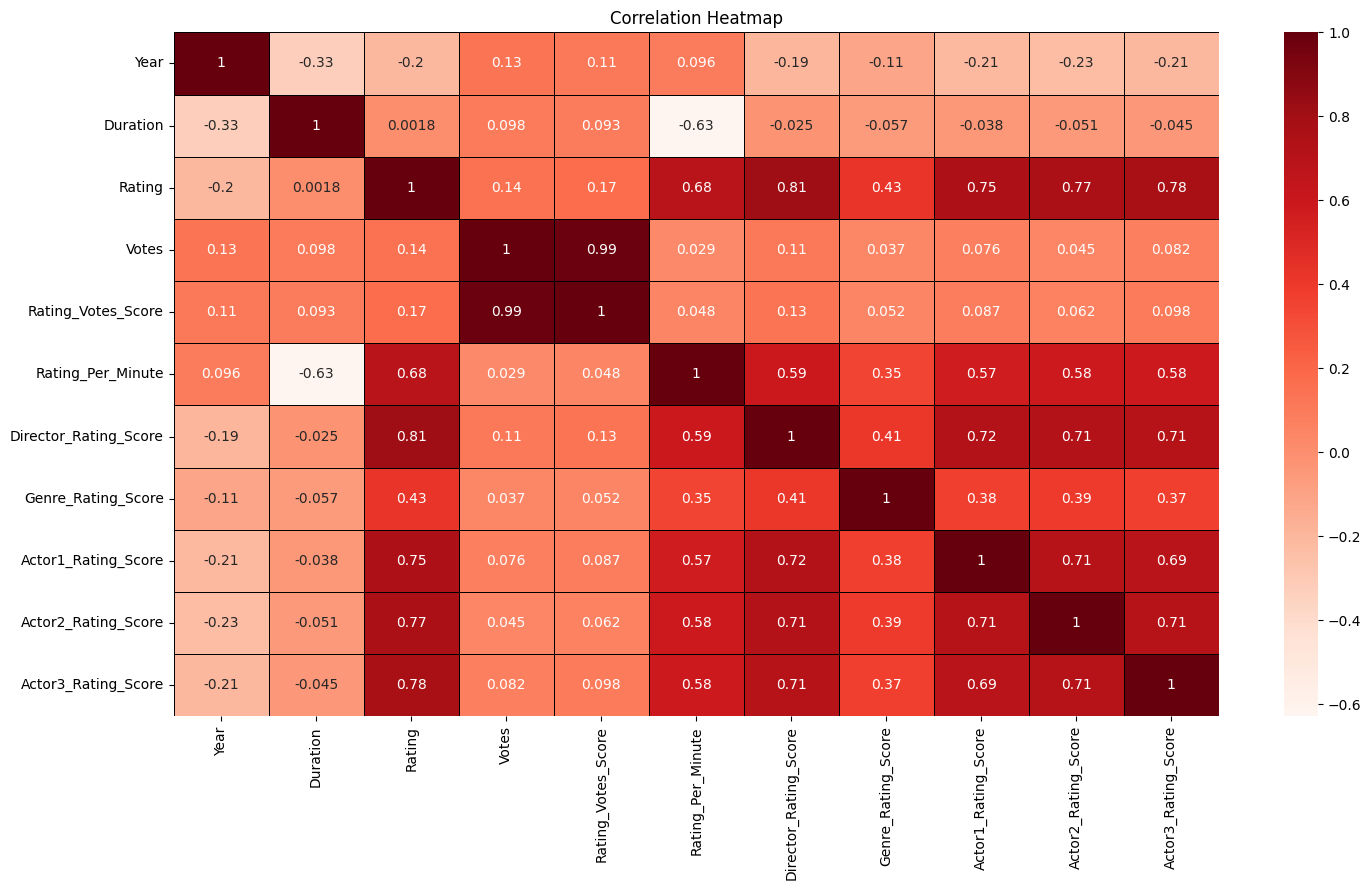

In [26]:
import seaborn as sns

corr = data.select_dtypes(include=['int64','float64']).corr()

plt.figure(figsize=(15,9))
sns.heatmap(
    corr,
    annot=True,
    cmap='Reds',       
    linewidths=0.5,
    linecolor='black'
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

> I found all features that are correlated with Rating column exept Duration and Vote 

## Modeling (ML):

#### Splitting Dataset:

In [27]:
data_ml = data.select_dtypes(exclude=['object'])
data_ml

,Year,Duration,Rating,Votes,Rating_Votes_Score,Rating_Per_Minute,Director_Rating_Score,Genre_Rating_Score,Actor1_Rating_Score,Actor2_Rating_Score,Actor3_Rating_Score
1,2019,109,7.0,8,56.0,0.064220,7.000000,6.415521,6.850000,7.000000,7.000000
3,2019,110,4.4,35,154.0,0.040000,4.400000,5.716822,5.420000,4.400000,4.450000
5,1997,147,4.7,827,3886.9,0.031973,5.313333,6.242222,4.788889,5.786667,5.872727
6,2005,142,7.4,1086,8036.4,0.052113,7.383333,6.820000,5.435000,6.933333,6.500000
8,2012,82,5.6,326,1825.6,0.068293,5.600000,5.477778,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,2488.8,0.053043,6.100000,6.415521,6.725000,6.100000,5.850000
15494,2001,153,6.2,1496,9275.2,0.040523,7.250000,6.950000,4.157143,5.823077,5.954545
15503,1989,125,5.8,44,255.2,0.046400,6.270000,5.743465,6.307692,5.800000,6.050000
15505,1999,129,4.5,655,2947.5,0.034884,5.225000,5.516505,5.481707,4.640000,5.737500


In [28]:
from sklearn.model_selection import train_test_split

# target variable
y = data_ml['Rating']

# features (all columns except Rating)
X = data_ml.drop('Rating', axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
X_train.shape,y_train.shape 

((4527, 10), (4527,))

In [30]:
X_test.shape,y_test.shape 

((1132, 10), (1132,))

#### Build model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

The accuracy of the Linear Regression Model Train is 85.97
The accuracy of the  Linear Regression Model Test is 86.99


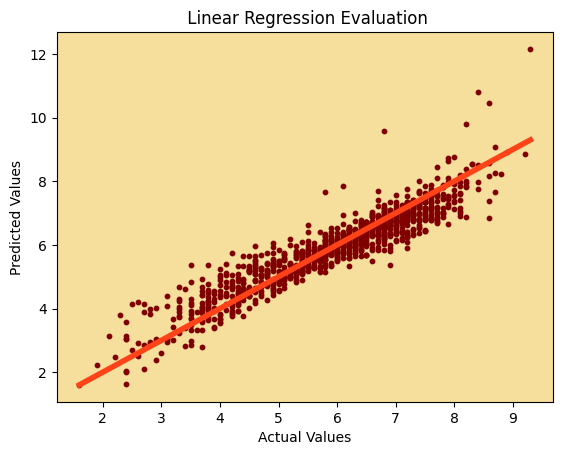


The accuracy of the Random Forest Model Train is 99.70
The accuracy of the  Random Forest Model Test is 97.48


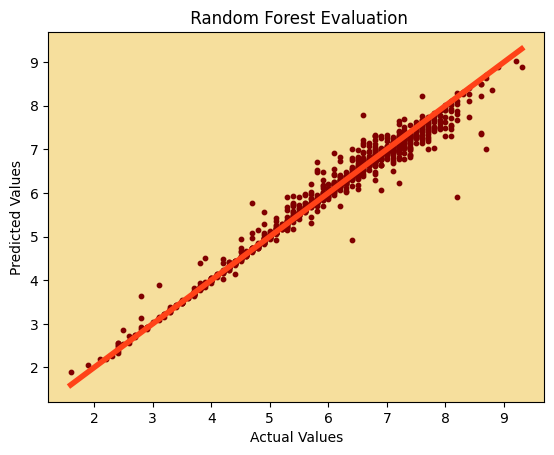


The accuracy of the Gradient Boost Model Train is 98.60
The accuracy of the  Gradient Boost Model Test is 97.36


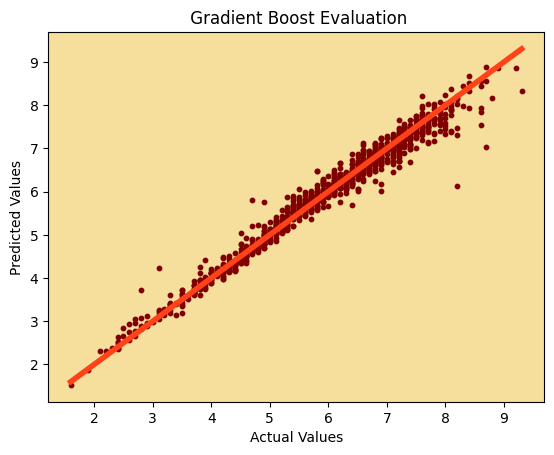


The accuracy of the XGBoost Model Train is 99.94
The accuracy of the  XGBoost Model Test is 98.39


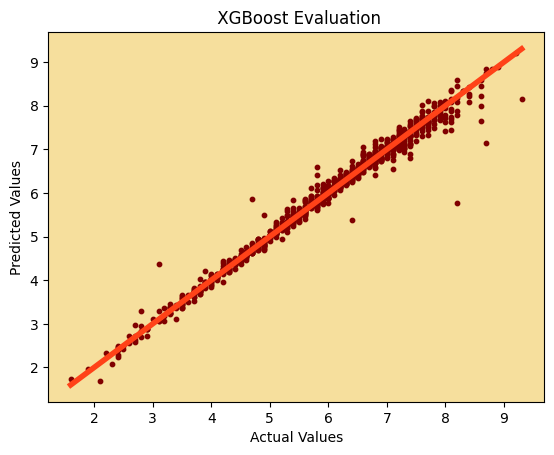


The accuracy of the KNN Model Train is 89.12
The accuracy of the  KNN Model Test is 84.01


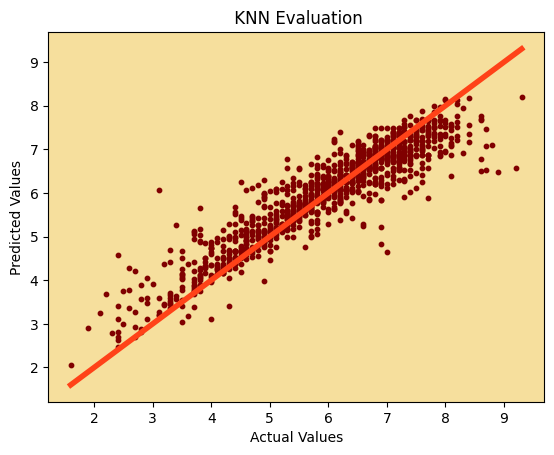


The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 94.81


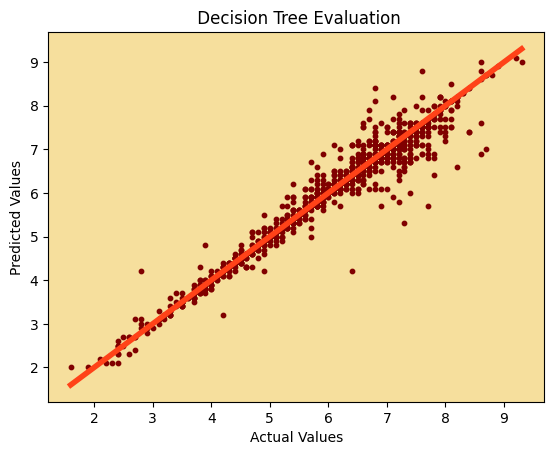


The accuracy of the Bagging Regressor Model Train is 99.71
The accuracy of the  Bagging Regressor Model Test is 97.49


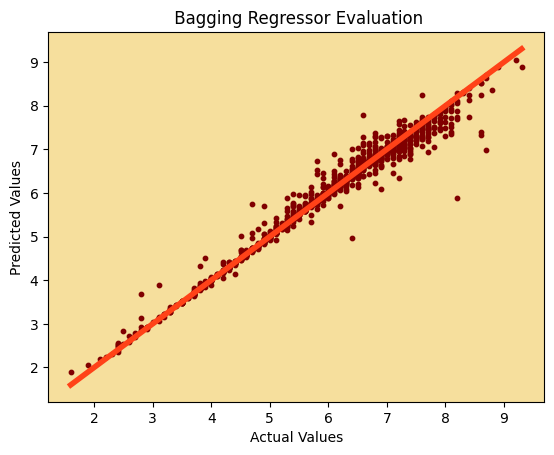

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.869894,0.240923,0.869894
1,Random Forest,0.974839,0.046591,0.974839
2,Gradient Boost,0.973573,0.048935,0.973573
3,XGBoost,0.983944,0.029731,0.983944
4,KNN,0.840137,0.296026,0.840137
5,Decision Tree,0.948067,0.096166,0.948067
6,Bagging Regressor,0.974901,0.046478,0.974901


In [32]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#800000')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#FF4218', linewidth = 4)
    # set chart background color
    plt.gca().set_facecolor('#F6DF9D')
    plt.show()
    print()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)
     

#### Model Testing:

In [33]:
import pandas as pd

# create trial df
trial_df = pd.DataFrame({
    'Year':[2020,2022],
    'Duration':[120,95],
    'Votes':[1500,450],
    'Rating_Votes_Score':[1425.88,925.69],
    'Rating_Per_Minute':[0.173,0.261],
    'Director_Rating_Score':[7.82,6.77],
    'Genre_Rating_Score':[5.85,4.74],
    'Actor1_Rating_Score':[8.89,3.75],
    'Actor2_Rating_Score':[5.86,7.73],
    'Actor3_Rating_Score':[4.88,5.78]
})


pred_results = []

for name, model in models:
    pred = model.predict(trial_df)
    pred_results.append([name, pred])

pred_df = pd.DataFrame(pred_results, columns=['Model','Predicted Rating'])
display(pred_df)



,Model,Predicted Rating
0,Linear Regression,"[12.018040539430054, 15.288922113048699]"
1,Random Forest,"[8.272999999999994, 7.401000000000002]"
2,Gradient Boost,"[7.987901358387252, 6.98825358955148]"
3,XGBoost,"[8.569665, 7.1247993]"
4,KNN,"[2.2199999999999998, 2.4]"
5,Decision Tree,"[8.9, 6.700000000000001]"
6,Bagging Regressor,"[8.265999999999998, 7.385333333333333]"


### Conclusion:

------------------

Based on the evaluation results, the XGBoost model demonstrated the highest performance among all tested regression models. It achieved the highest R² score (0.9839) and the lowest MSE value (0.0297), which indicates that this model is capable of explaining almost 98% of the variance in the movie ratings, while maintaining the smallest prediction error. Other ensemble models such as Random Forest and Bagging Regressor also performed very well, achieving R² scores near 0.97, showing that ensemble-based approaches are generally more powerful for this problem. In contrast, simpler models like Linear Regression and KNN achieved lower performance, which suggests that the relationship between features and movie rating is non-linear and more complex. 